In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('private_pt.csv')

In [4]:
df.head(5)

,Unnamed: 0,apex,domain_malicious,subdomain_malicious,#total_scans,#benign_scans,#query,#ip,#ns,ns_matching,...,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,0,missaomagalu.com,True,False,30.0,0.0,205.0,1.0,1.0,True,...,14.480000,0.0,72,1,1,0,0,0,1000000.0000,False
1,1,nadescomister.org,True,False,18.0,0.0,2.0,1.0,1.0,True,...,28.750000,0.0,81,1,1,0,0,0,1000000.0000,False
2,2,keeleycollc.org,True,False,17.0,0.0,915.0,2.0,1.0,True,...,10.333333,0.0,70,1,1,1,0,0,1000000.0000,False
3,3,wldptmfls.com,True,True,38.0,1.0,722.0,1.0,1.0,True,...,1.000000,0.0,53,1,1,0,0,0,1000000.0000,False
4,4,fddfgf55.xyz,True,False,262.0,0.0,236.0,3.0,1.0,True,...,23.305882,0.0,81,1,1,0,0,0,1653.8948,False


In [5]:
df.columns

Index(['Unnamed: 0', 'apex', 'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'label', 'positives', 'response_code',
       'rlength', 'url_after_redirects', 'url', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'],
      dtype='object')

In [6]:
df = df[['fqdn', 'vt_duration', 'vt_count', 'vt_mal_count',
       'vt_ratio', 'firstseen', 'lastseen', '#query', '#ip', '#ns',
       'ns_matching', '#soa', 'soa_matching', 'positives',
       'response_code', 'rlength', 'url_after_redirects', 'url',
       'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
       'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

KeyError: "['firstseen', 'vt_duration', 'lastseen', 'vt_mal_count', 'vt_count', 'vt_ratio', 'fqdn'] not in index"

In [7]:
df.dtypes

fqdn                                                    object
vt_duration                                            float64
vt_count                                                 int64
vt_mal_count                                             int64
vt_ratio                                               float64
firstseen                                               object
lastseen                                                object
#query                                                 float64
#ip                                                    float64
#ns                                                    float64
ns_matching                                             object
#soa                                                   float64
soa_matching                                            object
positives                                                int64
response_code                                           object
rlength                                                

In [8]:
df.isnull().sum()

fqdn                                                      0
vt_duration                                               0
vt_count                                                  0
vt_mal_count                                              0
vt_ratio                                                  0
firstseen                                              2502
lastseen                                               2502
#query                                                 2502
#ip                                                    2502
#ns                                                    2502
ns_matching                                            2502
#soa                                                   2502
soa_matching                                           2502
positives                                                 0
response_code                                             0
rlength                                                   0
url_after_redirects                     

In [9]:
df = df.fillna(0)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['ns_matching'] = label_encoder.fit_transform(df['ns_matching'])
# df['soa_matching'] = label_encoder.fit_transform(df['soa_matching'])
df['response_code'] = label_encoder.fit_transform(df['response_code'])
df['rlength'] = label_encoder.fit_transform(df['rlength'])
df['url_after_redirects'] = label_encoder.fit_transform(df['url_after_redirects'])
df['domain_malicious'] = label_encoder.fit_transform(df['domain_malicious'])
df['suspicious_tld'] = label_encoder.fit_transform(df['suspicious_tld'])
# df['is_idn'] = label_encoder.fit_transform(df['is_idn'])
# df['label'] = label_encoder.fit_transform(df['label'])

In [11]:
df.dtypes

fqdn                                                    object
vt_duration                                            float64
vt_count                                                 int64
vt_mal_count                                             int64
vt_ratio                                               float64
firstseen                                               object
lastseen                                                object
#query                                                 float64
#ip                                                    float64
#ns                                                    float64
ns_matching                                              int64
#soa                                                   float64
soa_matching                                            object
positives                                                int64
response_code                                            int64
rlength                                                

In [12]:
df.isnull().sum()

fqdn                                                   0
vt_duration                                            0
vt_count                                               0
vt_mal_count                                           0
vt_ratio                                               0
firstseen                                              0
lastseen                                               0
#query                                                 0
#ip                                                    0
#ns                                                    0
ns_matching                                            0
#soa                                                   0
soa_matching                                           0
positives                                              0
response_code                                          0
rlength                                                0
url_after_redirects                                    0
url                            

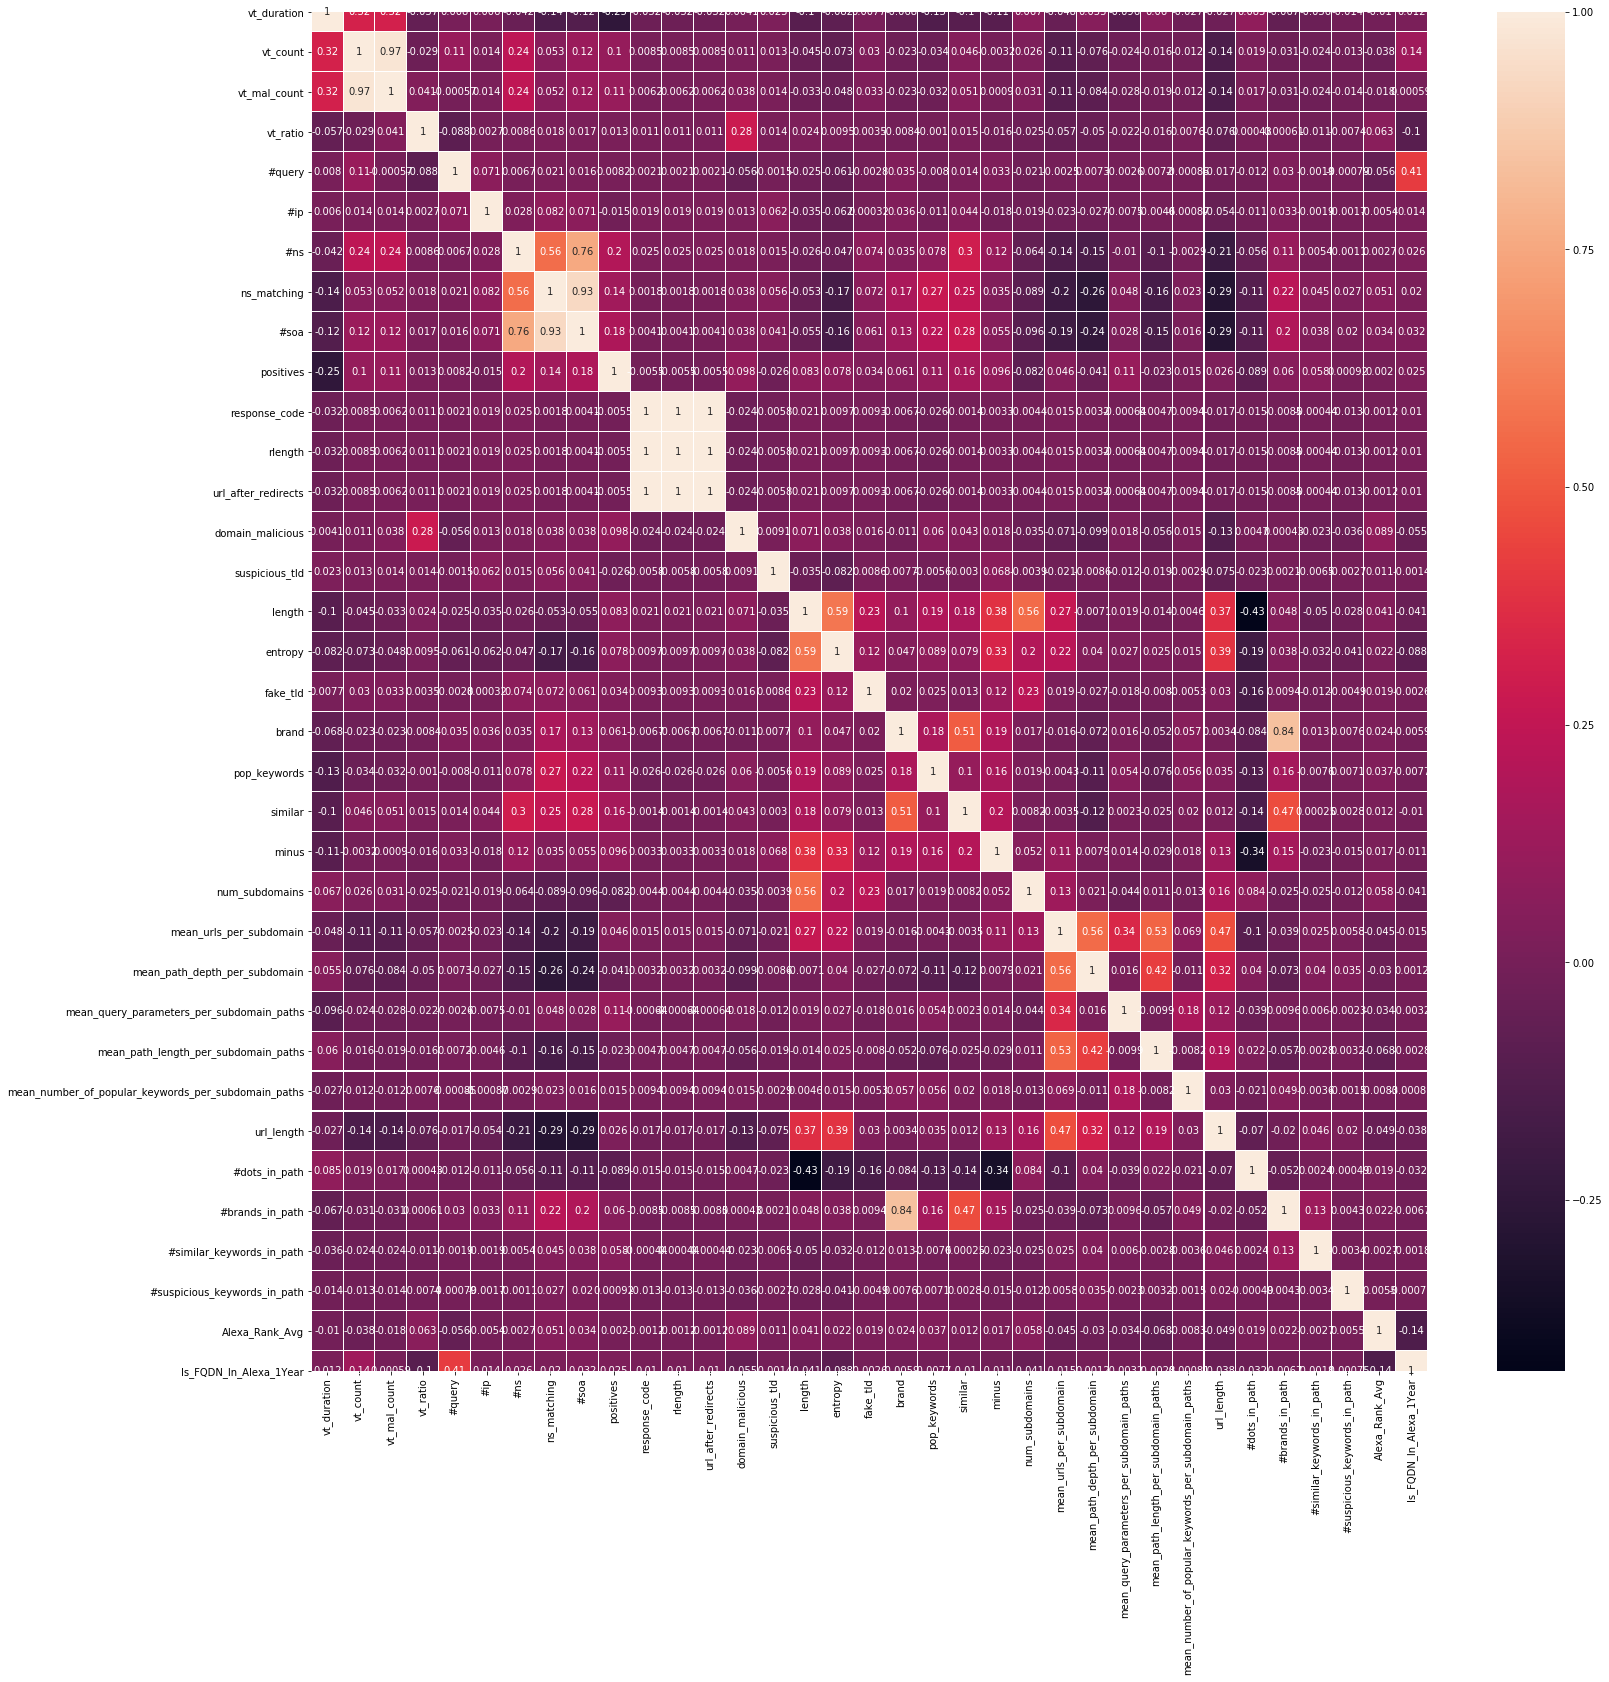

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True ,linewidths=.05)
# plt.savefig('attacker_created_compromised_corr_gt1.png')
plt.show()

In [14]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(df[['vt_duration', 'vt_count', 'vt_mal_count',
#        'vt_ratio', '#query', '#ip', '#ns',
#        'ns_matching', '#soa', 'positives',
#        'response_code', 'rlength', 'url_after_redirects',
#        'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
#        'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
#        'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
#        'mean_query_parameters_per_subdomain_paths',
#        'mean_path_length_per_subdomain_paths',
#        'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
#        '#dots_in_path', '#brands_in_path',
#        '#similar_keywords_in_path', '#suspicious_keywords_in_path',
#        'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']], df.label, test_size = 0.20, random_state = 0)

In [15]:
# df = df[['vt_duration', 'vt_count', 'vt_mal_count',
#        'vt_ratio', '#query', '#ip', '#ns',
#        'ns_matching', '#soa', 'positives',
#        'response_code', 'rlength', 'url_after_redirects',
#        'domain_malicious', 'suspicious_tld', 'length', 'entropy', 'fake_tld',
#        'brand', 'pop_keywords', 'similar', 'minus', 'num_subdomains',
#        'mean_urls_per_subdomain', 'mean_path_depth_per_subdomain',
#        'mean_query_parameters_per_subdomain_paths',
#        'mean_path_length_per_subdomain_paths',
#        'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
#        '#dots_in_path', '#brands_in_path',
#        '#similar_keywords_in_path', '#suspicious_keywords_in_path',
#        'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

In [16]:
import pickle

In [17]:
RFC = pickle.load(open('attacker_created_compromised_classifier_rf_gt_2_priv.pickle','rb'))

In [18]:
# RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
# RFC.fit(X_train,Y_train)
# predictions_RFC = RFC.predict(df)

In [19]:
from tqdm import tqdm_notebook
data = []
for index, row in tqdm_notebook(df.iterrows()):
    
    fqdn = row.fqdn
    
    row = row[[
        'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar' ,'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path'
    ]]
    
    
    data.append({'fqdn' : fqdn,
    'predict' : RFC.predict([row])[0],
    'predict prob' : RFC.predict_proba([row])[0]
        })
    
data = pd.DataFrame(data)

In [20]:
data

,fqdn,predict,predict prob
0,vrx8103149.carol-peletier.mrbasic.com,1,"[0.22259136212624583, 0.7774086378737541]"
1,latampromojaneiro.dynssl.com,1,"[0.3089700996677741, 0.6910299003322259]"
2,theviral01.blogspot.com,0,"[0.5382059800664452, 0.46179401993355484]"
3,arecssx.000webhostapp.com,1,"[0.2591362126245847, 0.7408637873754153]"
4,dterdtdfgsr.bounceme.net,1,"[0.11295681063122924, 0.8870431893687708]"
...,...,...,...
4995,unpaidverifyauth.serveirc.com,1,"[0.10631229235880399, 0.893687707641196]"
4996,test0815.test0815.bplaced.com,1,"[0.2823920265780731, 0.717607973421927]"
4997,oval-purchasecombat.servebeer.com,1,"[0.22591362126245848, 0.7740863787375415]"
4998,mohamedkabir007.000webhostapp.com,1,"[0.3023255813953488, 0.6976744186046512]"


In [21]:
data.to_csv('pub_mal_w1.uniq.eval.5k.eval.rslt.csv')

In [22]:
data.loc[data.predict==1].shape

(4025, 3)

In [23]:
data.loc[data.predict==0].shape

(975, 3)